In [1]:
import pandas as pd
import numpy as np

ml_data = pd.read_csv('transformed_data.csv', encoding='cp949')
ml_data.drop(['Season', 'HomeTeam', 'AwayTeam'], inplace = True, axis=1)
ml_data['Result'] = ml_data['Result'].replace([3, 1, 0],[1, 0, -1])
ml_data

,FTG,FTR,HTG,HTR,S,ST,C,F,Y,Rn,R1,LSR,CSR,LHAP,LMP,LMHAP,Result
0,0,3,1.0,5,-4.0,2.0,7.0,-26.0,-9.0,-1.0,0.0,7,0,4,0,3,-1
1,-8,-3,0.0,0,-16.0,-18.0,-8.0,-1.0,-3.0,1.0,0.0,4,0,1,0,0,1
2,8,5,5.0,3,15.0,18.0,11.0,7.0,4.0,1.0,0.0,6,0,11,0,3,1
3,-1,-1,-2.0,2,7.0,7.0,-5.0,17.0,9.0,0.0,0.0,8,0,3,0,0,-1
4,8,10,1.0,6,1.0,3.0,-7.0,-9.0,-7.0,0.0,0.0,12,0,9,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7665,-11,-3,-2.0,-2,-21.0,-31.0,-4.0,1.0,5.0,0.0,0.0,-8,5,-3,0,3,0
7666,-4,-3,-1.0,1,13.0,-7.0,-5.0,-2.0,-7.0,0.0,0.0,-9,-1,-1,-6,3,0
7667,3,6,2.0,8,43.0,21.0,25.0,47.0,9.0,1.0,0.0,4,-4,9,9,3,1
7668,9,8,3.0,8,73.0,25.0,28.0,41.0,4.0,1.0,0.0,15,3,7,0,0,-1


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()
#StandardScaler로 데이터 세트 변환. fit()과 transform() 호출.
scaler.fit(ml_data)
ml_data_scaled = scaler.transform(ml_data)

#transform() 시 스케일 변환된 데이터 세트가 NumPy ndarray로 반환돼 이를 DataFrame으로 변환
ml_data_df_scaled = pd.DataFrame(data=ml_data_scaled, columns=ml_data.columns)

ml_data_df_scaled.describe()

,FTG,FTR,HTG,HTR,S,ST,C,F,Y,Rn,R1,LSR,CSR,LHAP,LMP,LMHAP,Result
count,7670.000000,7.670000e+03,7.670000e+03,7.670000e+03,7.670000e+03,7.670000e+03,7.670000e+03,7.670000e+03,7.670000e+03,7.670000e+03,7.670000e+03,7.670000e+03,7.670000e+03,7.670000e+03,7.670000e+03,7.670000e+03,7670.000000
mean,0.000000,2.964455e-17,1.482227e-17,-4.446682e-17,1.482227e-17,2.964455e-17,5.928909e-17,-1.482227e-17,-5.928909e-17,8.152250e-17,1.111671e-17,-3.294482e-17,1.019031e-17,-5.187796e-17,2.501259e-17,4.631960e-17,0.000000
std,1.000065,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065e+00,1.000065
min,-3.296007,-2.919222e+00,-3.308928e+00,-2.721832e+00,-2.490800e+00,-2.927741e+00,-2.936833e+00,-2.597486e+00,-3.391687e+00,-4.815951e+00,-2.529713e+01,-2.214967e+00,-2.423653e+00,-3.562736e+00,-2.342671e+00,-3.025285e+00,-1.372952
25%,-0.596184,-7.282701e-01,-5.144468e-01,-6.285141e-01,-6.684412e-01,-6.813832e-01,-6.965248e-01,-6.894297e-01,-7.600806e-01,-7.829183e-02,-1.318589e-02,-7.755575e-01,-7.499397e-01,-6.663971e-01,-4.431244e-01,-3.090235e-01,-1.372952
50%,-0.017650,2.047174e-03,-1.651367e-01,-5.185534e-04,-2.360171e-01,-1.197939e-01,-1.693934e-01,-2.610905e-01,-1.527868e-01,-7.829183e-02,-1.318589e-02,-4.908226e-04,2.254334e-02,1.059599e-01,3.176230e-02,-3.090235e-01,-0.196355
75%,0.560883,7.323645e-01,5.334835e-01,6.274770e-01,4.435065e-01,6.782541e-01,6.213038e-01,4.008884e-01,6.569383e-01,-7.829183e-02,-1.318589e-02,7.745759e-01,6.662792e-01,6.852277e-01,5.066490e-01,7.774812e-01,0.980241
max,4.803463,2.558158e+00,3.677275e+00,2.930127e+00,3.439588e+00,4.106905e+00,3.586418e+00,3.671842e+00,3.086113e+00,3.474953e+00,2.527076e+01,2.213985e+00,2.468740e+00,2.229942e+00,2.406196e+00,2.407238e+00,0.980241


In [4]:
# X, y 데이터 분할 및 머신러닝 데이터 분할

X_ml_data = ml_data_df_scaled.iloc[:, 0:-1]
y_ml_data = ml_data['Result']
X_train, X_test, y_train, y_test = train_test_split(X_ml_data, y_ml_data, test_size=0.2, stratify=y_ml_data)

In [10]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
pred_proba = dt_clf.predict_proba(X_test)
print(accuracy)
pd.Series(pred).value_counts()

0.4152542372881356


 1    686
-1    456
 0    392
dtype: int64

In [5]:
from sklearn.ensemble import VotingClassifier

dt_clf_list = []
for i in range(3):
    clf_name = 'LR'+str(i+1)
    clf = LogisticRegression(C=100000,solver='newton-cg')
    dt_clf_list.append((clf_name, clf))
for i in range(3):
    clf_name = 'GB'+str(i+1)
    clf = GradientBoostingClassifier()
    dt_clf_list.append((clf_name, clf))

vo_clf = VotingClassifier(estimators=dt_clf_list, voting='soft')

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print(pd.Series(pred).value_counts())
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))



 1    1027
-1     493
 0      14
dtype: int64
Voting 분류기 정확도: 0.5280


In [5]:
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도:{0:.2f}%'.format(gb_accuracy*100))
pd.Series(gb_pred).value_counts()

GBM 정확도:53.52%


 1    1018
-1     463
 0      53
dtype: int64

In [7]:
def custom_threshold(n, pred_proba):
    prediction_array = np.array([])
    for lst in pred_proba:
        lst[1] *= n
        mx = lst.max()
        prediction_array = np.append(prediction_array, lst.tolist().index(mx)-1)
    prediction_array.astype('int64')
    return prediction_array

In [30]:
prediction_array = custom_threshold(1.13, pred_proba)
accu = accuracy_score(prediction_array, y_test)
print(accu)

0.5215123859191656


In [8]:
def recall_precision_draw_rate(pred, y_test):
    pred_series = pd.Series(pred)
    answer_series = pd.Series(y_test)
    answer_series = answer_series.reset_index(drop=True)

    pred_answer_df = pd.concat([pred_series, answer_series], axis=1)
    pred_answer_df.rename(columns = {0 : 'prediction', 'Result':'answer'}, inplace = True)

    # 실제 무승부 중에서 무승부 예측의 확률
    answer_len = len(pred_answer_df[pred_answer_df['answer'] == 0])
    draw_len = len(pred_answer_df[(pred_answer_df['answer'] == 0)&(pred_answer_df['prediction'] == 0)])
    try:
        recall = draw_len/answer_len
    except ZeroDivisionError:
        recall = 0

    # 무승부 예측 중에서 실제 무승부인 확률
    answer_pre_len = len(pred_answer_df[pred_answer_df['prediction'] == 0])
    draw_pre_len = len(pred_answer_df[(pred_answer_df['answer'] == 0)&(pred_answer_df['prediction'] == 0)])
    try:
        precision = draw_pre_len/answer_pre_len
    except ZeroDivisionError:
        precision = 0
    return recall, precision

In [9]:
threshold = []
accuracy = []
recall = []
precision = []
for i in range(600):
    pred_proba = vo_clf.predict_proba(X_test)
    n1 = 1 + i/1000
    threshold.append(n1)
    pred_customed = custom_threshold(n1, pred_proba)
    accu=accuracy_score(pred_customed, y_test)
    accuracy.append(accu)
    r, p = recall_precision_draw_rate(pred_customed, y_test)
    recall.append(r)
    precision.append(p)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

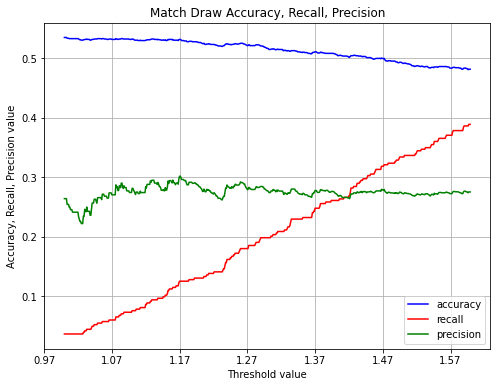

In [57]:
plt.figure(figsize=(8, 6))
plt.plot(threshold, accuracy, label='accuracy', color='b')
plt.plot(threshold, recall, label='recall', color='r')
plt.plot(threshold, precision, label='precision', color='g')

start, end = plt.xlim()
plt.xticks(np.round(np.arange(start, end, 0.1), 2))

# x축 y축 label, legend, title, grid 설정
plt.xlabel('Threshold value'); plt.ylabel('Accuracy, Recall, Precision value')
plt.title('Match Draw Accuracy, Recall, Precision')
plt.legend(); plt.grid()
plt.show()

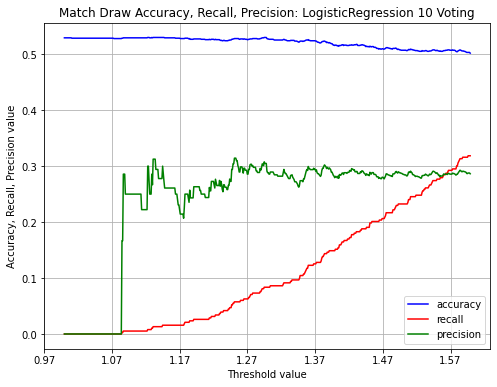

In [69]:
plt.figure(figsize=(8, 6))
plt.plot(threshold, accuracy, label='accuracy', color='b')
plt.plot(threshold, recall, label='recall', color='r')
plt.plot(threshold, precision, label='precision', color='g')

start, end = plt.xlim()
plt.xticks(np.round(np.arange(start, end, 0.1), 2))

# x축 y축 label, legend, title, grid 설정
plt.xlabel('Threshold value'); plt.ylabel('Accuracy, Recall, Precision value')
plt.title('Match Draw Accuracy, Recall, Precision: LogisticRegression 10 Voting')
plt.legend(); plt.grid()
plt.show()

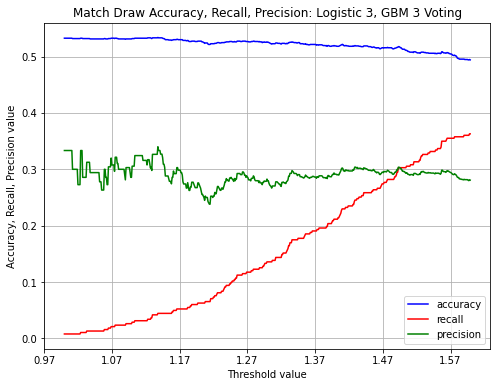

In [77]:
plt.figure(figsize=(8, 6))
plt.plot(threshold, accuracy, label='accuracy', color='b')
plt.plot(threshold, recall, label='recall', color='r')
plt.plot(threshold, precision, label='precision', color='g')

start, end = plt.xlim()
plt.xticks(np.round(np.arange(start, end, 0.1), 2))

# x축 y축 label, legend, title, grid 설정
plt.xlabel('Threshold value'); plt.ylabel('Accuracy, Recall, Precision value')
plt.title('Match Draw Accuracy, Recall, Precision: Logistic 3, GBM 3 Voting')
plt.legend(); plt.grid()
plt.show()

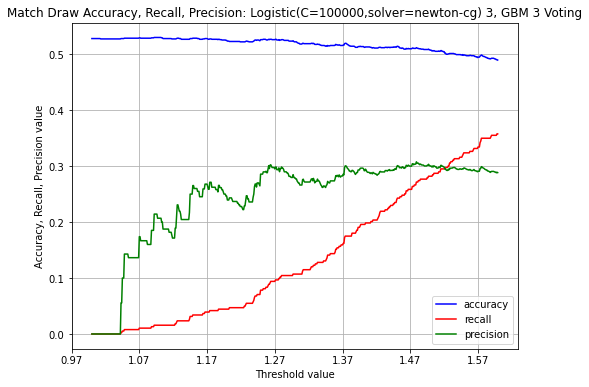

In [10]:
plt.figure(figsize=(8, 6))
plt.plot(threshold, accuracy, label='accuracy', color='b')
plt.plot(threshold, recall, label='recall', color='r')
plt.plot(threshold, precision, label='precision', color='g')

start, end = plt.xlim()
plt.xticks(np.round(np.arange(start, end, 0.1), 2))

# x축 y축 label, legend, title, grid 설정
plt.xlabel('Threshold value'); plt.ylabel('Accuracy, Recall, Precision value')
plt.title('Match Draw Accuracy, Recall, Precision: Logistic(C=100000,solver=newton-cg) 3, GBM 3 Voting')
plt.legend(); plt.grid()
plt.show()

### Accuracy 손실을 최소화하면서 무승부 예측 빈도의 Recall과 Precision값이 충분히 높아지는 Logistic 3, GBM 3 Voting 1.465값을 선택하기로 한다.

In [11]:
# Threshold 지수가 1일 때
dt_clf_list = []
for i in range(3):
    clf_name = 'LR'+str(i+1)
    clf = LogisticRegression()
    dt_clf_list.append((clf_name, clf))
for i in range(3):
    clf_name = 'GB'+str(i+1)
    clf = GradientBoostingClassifier()
    dt_clf_list.append((clf_name, clf))

vo_clf = VotingClassifier(estimators=dt_clf_list, voting='soft')

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print(pd.Series(pred).value_counts())
print('Voting 분류기 정확도: {0:.2f}%'.format(accuracy_score(y_test, pred)*100))

 1    1025
-1     495
 0      14
dtype: int64
Voting 분류기 정확도: 52.93%


In [12]:
def custom_threshold(n, pred_proba):
    prediction_array = np.array([])
    for lst in pred_proba:
        lst[1] *= n
        mx = lst.max()
        prediction_array = np.append(prediction_array, lst.tolist().index(mx)-1)
    prediction_array.astype('int64')
    return prediction_array

In [37]:
# Threshold 지수를 1.5로 높였을 때
pred_customed = custom_threshold(1.465, vo_clf.predict_proba(X_test))
accuracy = accuracy_score(pred_customed, y_test)
recall, precision = recall_precision_draw_rate(pred_customed, y_test)
print('정확도:{0:.2f}%, 재현율:{1:.2f}%, 정밀도:{2:.2f}%'.format(accuracy*100, recall*100, precision*100))
print(pd.Series(pred_customed).value_counts())

정확도:51.11%, 재현율:25.59%, 정밀도:30.34%
 1.0    850
-1.0    361
 0.0    323
dtype: int64
